<div class="alert alert-block alert-success">
    <h1 align="center">Training a Model to Predict Formation Energy of Perovskite's Materials</h1>
    <h3 align="center">Mahan Sattarpour</h3>
</div>

## Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.preprocessing import StandardScaler

## Feature Engineering

In [2]:
data = pd.read_csv('materials.csv') 

corr_matrix = data.corr()

plt.figure(figsize=(200, 100))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Materials Dataset")
plt.show()

/var/folders/hz/7kvz61zn44q696fx1cdst8080000gn/T/ipykernel_54598/1153566172.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


## Prepare and Process Data

In [3]:
features = [
    'Number of elements', 'host_Bsite0_At. #', 'host_Asite0_NsValence', 
    'Asite_IsAlkali_max', 'Bsite_IsMetal_max'
]
target = 'formation_energy (eV/atom)'

X = data[features]
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling data 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Random Forest Model

In [4]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
print("R-squared for Random Forest Regressor:", r2_rf)

R-squared for Random Forest Regressor: 0.8606114730076391


## Gradeint Boosting Regression Model

In [5]:
model_gbr = GradientBoostingRegressor(random_state=42)
model_gbr.fit(X_train, y_train)
y_pred_gbr = model_gbr.predict(X_test)

r2_gbr = r2_score(y_test, y_pred_gbr)
print("R-squared for Gradient Boosting Regressor:", r2_gbr)

R-squared for Gradient Boosting Regressor: 0.8647122935419644


## Support Vector Regression Model

In [6]:
model_svr = SVR()
model_svr.fit(X_train, y_train)
y_pred_svr = model_svr.predict(X_test)

r2_svr = r2_score(y_test, y_pred_svr)
print("R-squared for Support Vector Regressor:", r2_svr)

R-squared for Support Vector Regressor: 0.6425016395465523


## Basic Neural Network Model

In [7]:
model_bnn = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(1)
])
model_bnn.compile(optimizer='adam', loss='mean_squared_error')
model_bnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_bnn = model_bnn.predict(X_test_scaled)

r2_bnn = r2_score(y_test, y_pred_bnn)
print("R-squared for Basic Neural Network:", r2_bnn)

13/13 [==============================] - 0s 289us/step
R-squared for Basic Neural Network: 0.60659012396639


## Deep Neural Network Model

In [8]:
model_dnn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])
model_dnn.compile(optimizer='adam', loss='mean_squared_error')
model_dnn.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_dnn = model_dnn.predict(X_test_scaled)

r2_dnn = r2_score(y_test, y_pred_dnn)
print("R-squared for Deep Neural Network:", r2_dnn)

13/13 [==============================] - 0s 299us/step
R-squared for Deep Neural Network: 0.7797866781622766


## Convolutional Neural Network Model

In [9]:
model_cnn = Sequential([
    Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(1)
])
model_cnn.compile(optimizer='adam', loss='mean_squared_error')
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)
model_cnn.fit(X_train_scaled_cnn, y_train, epochs=10, batch_size=32, verbose=0)
y_pred_cnn = model_cnn.predict(X_test_scaled_cnn)

r2_cnn = r2_score(y_test, y_pred_cnn)
print("R-squared for CNN:", r2_cnn)

13/13 [==============================] - 0s 284us/step
R-squared for CNN: 0.6275176994740812


## Visualization

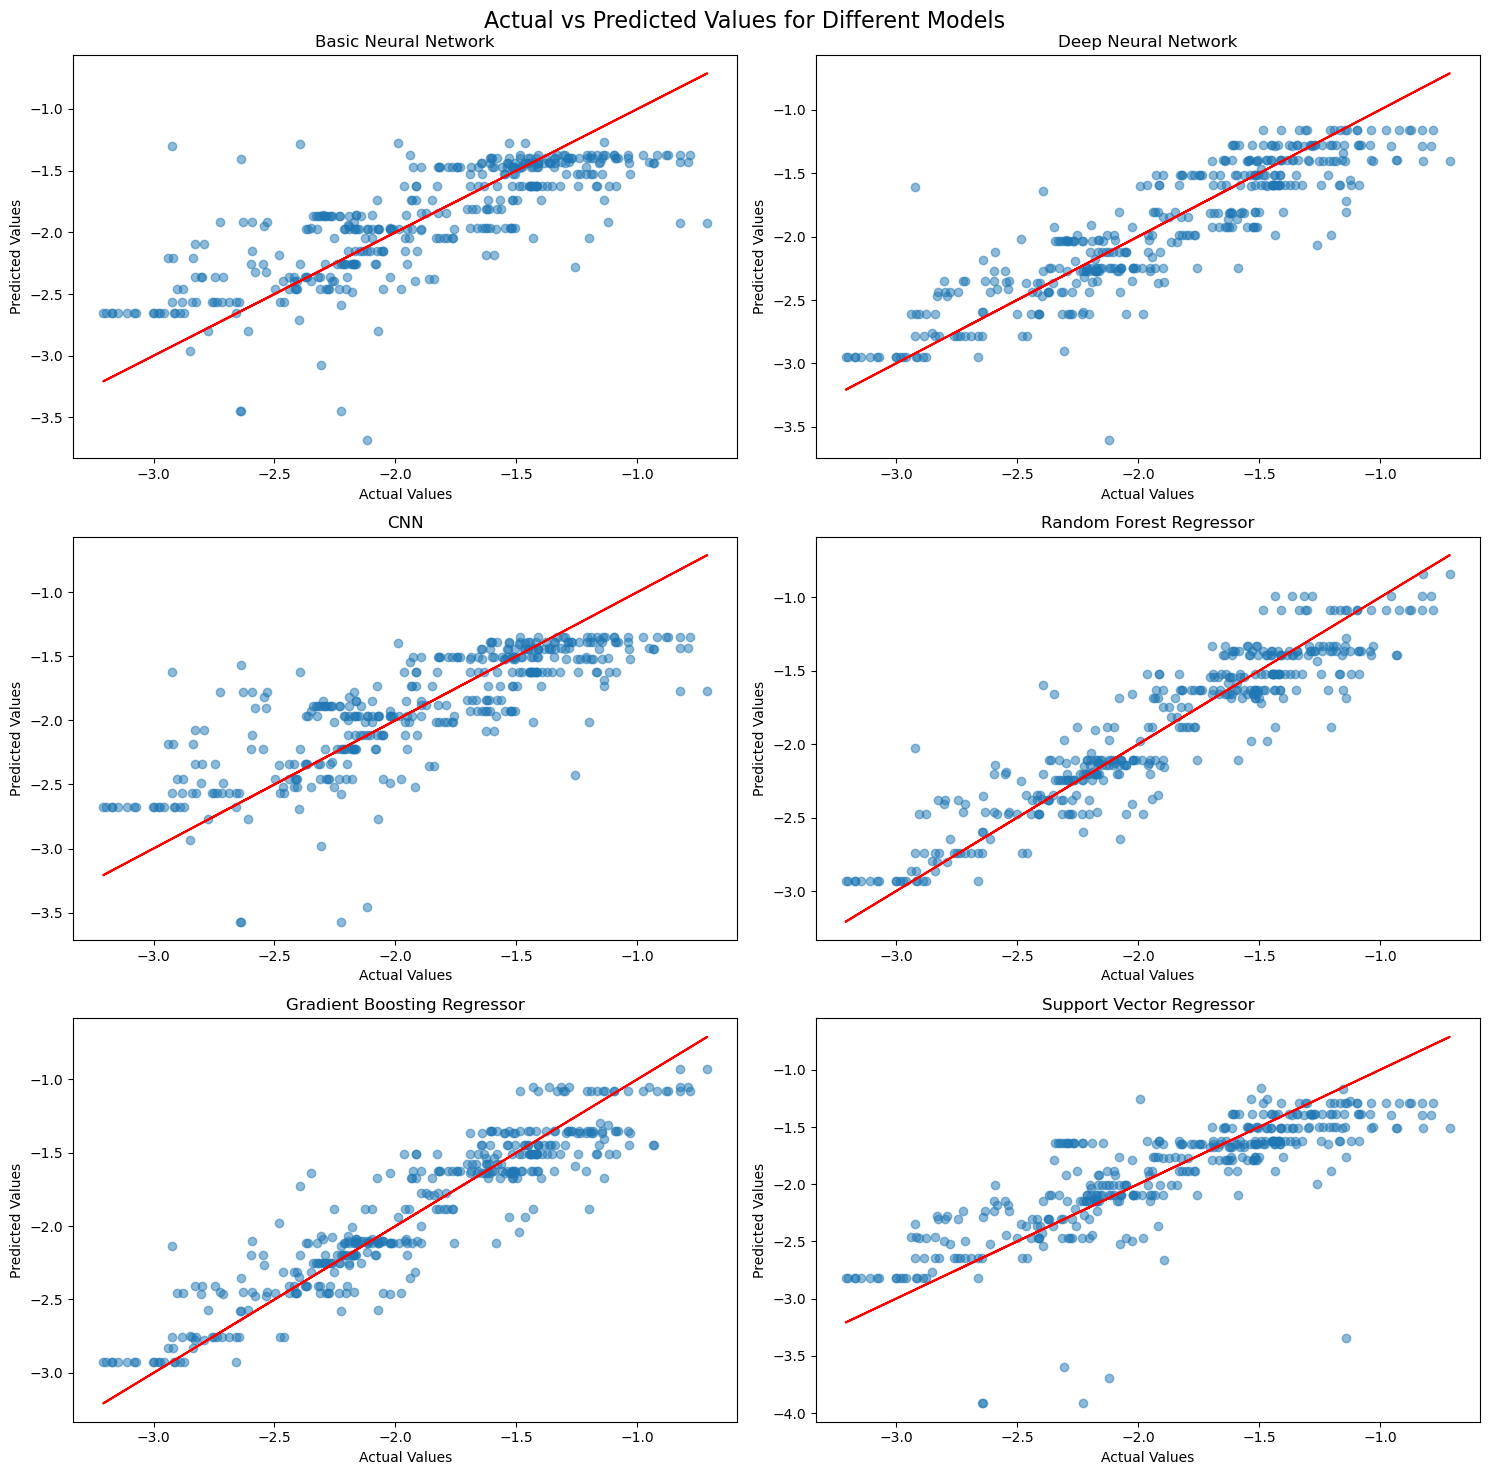

In [10]:
predictions = {
    'Basic Neural Network': y_pred_bnn,
    'Deep Neural Network': y_pred_dnn,
    'CNN': y_pred_cnn,
    'Random Forest Regressor': y_pred_rf,
    'Gradient Boosting Regressor': y_pred_gbr,
    'Support Vector Regressor': y_pred_svr
}

r2_scores_df = pd.DataFrame({
    'Model': ['Basic Neural Network', 'Deep Neural Network', 'CNN', 'Gradient Boosting Regressor', 'Random Forest Regressor', 'Support Vector Regressor'],
    'R-squared Score': [r2_bnn, r2_dnn, r2_cnn, r2_gbr, r2_rf, r2_svr]
})

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
fig.suptitle('Actual vs Predicted Values for Different Models', fontsize=16)

axes = axes.flatten()

for i, (model_name, y_pred) in enumerate(predictions.items()):
    axes[i].scatter(y_test, y_pred, alpha=0.5)
    axes[i].plot(y_test, y_test, color='red')
    axes[i].set_title(model_name)
    axes[i].set_xlabel('Actual Values')
    axes[i].set_ylabel('Predicted Values')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [11]:
r2_scores_df

Model  R-squared Score
0         Basic Neural Network         0.606590
1          Deep Neural Network         0.779787
2                          CNN         0.627518
3  Gradient Boosting Regressor         0.864712
4      Random Forest Regressor         0.860611
5     Support Vector Regressor         0.642502